# 선형 회귀

- 대표적인 회귀 알고리즘

In [4]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [5]:
perch_df = df.loc[df['Species'] == 'Perch']

perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [7]:
# 선형회귀 (linear)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [8]:
lr.score(test_input, test_target)

0.8831464257953449

In [9]:
lr.predict([[90]])
# kneighbor 경우는 근접한 곳의 값을 매기기 때문에 값이 아무리 커지거나 작아져도 인접한 값이 나오지만 선형회귀의 경우에는 선을 그어서 값을 예상함

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2707.70513464]])

### 모델 파라미터
- coef_ 와 intercept_ 를 머신러닝 알고리즘이 찾은 값이라는 의미
- 모델 기반 학습

- k-최근접 이웃에는 모델 파라미터가 없음 (사례 기반 학습)

- ml에서 기울기를 종종 coefficient(계수) or wight(가중치)라고 부름

In [10]:
lr.coef_

array([[37.4007755]])

In [11]:
lr.intercept_

array([-658.36466005])

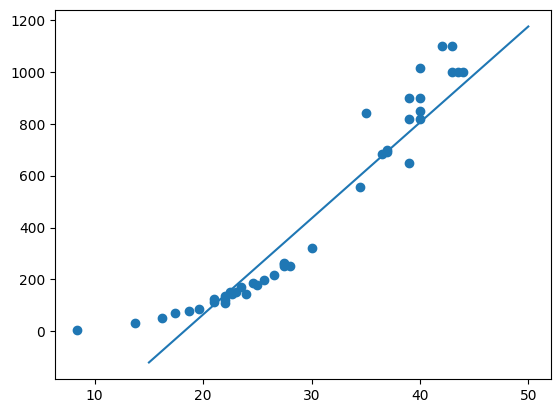

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 *  37 - 675, 50 * 37 -675]) #선그래프 , 시작점과 끝점

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.913917567478639
0.8831464257953449


In [14]:
lr.predict([[5]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-471.36078256]])

In [15]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
# train_input
# 새로운 항을 추가

In [16]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [17]:
lr.score(test_input, test_target)

0.9781659085541227

In [18]:
# column의 2개가 되었으니 값도 2개로 설정
lr.predict([[2, 4]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[86.92538794]])

In [19]:
# coef = 1 , intercept = -26
print(lr.coef_, lr.intercept_)

[[-22.52535113   1.02462836]] [127.87757674]


- 선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗음 그러면 농어의 무게가 0g 이하로 내려가는데 그건 현실적으로 불가능함
- 그걸 해결하기위하여 디항 회귀를 통하여 최적의 곡선을 찾음
- 2차 방정식도 선형 관계로 표현할 수 있음
- 다항식을 사용한 선형 회귀를 다항 회귀라 부름